# Introduction 
Ce notebook decrit le processus d'entraiment pour notre modele d'IA qui va nous permettre de predire la culture approprie our un sol donne en tenant compte des caracteristique du sol tel que Ph, temperature, azote, le phosphore, le potassuim, l'humitide

# 0)Imports

In [18]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import joblib



# 1) Charger les données

In [2]:
df = pd.read_csv("Crop_recommendation.csv")
print("Dimensions :", df.shape)
df.head()

Dimensions : (2200, 8)


,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


# 2) Inspection et nettoyage

In [3]:
df.info()
df.describe()

# Vérification des valeurs manquantes
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


# 3)Séparation des features et de la cible

In [5]:
X = df.drop("label", axis=1)
y = df["label"]

print("Variables explicatives :", X.columns.tolist())
print("Nombre de classes :", y.nunique())


Variables explicatives : ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
Nombre de classes : 22


# 4)Encodage + Normalisation

In [7]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 5) Division entraînement / test

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# 6)Entraînement du modèle Random Forest

In [9]:
model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42
)
model.fit(X_train, y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


# 7)Evaluation du modele

 Accuracy : 99.32 %

Rapport de classification :
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.95      0.97        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.95      1.00      0.98        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.

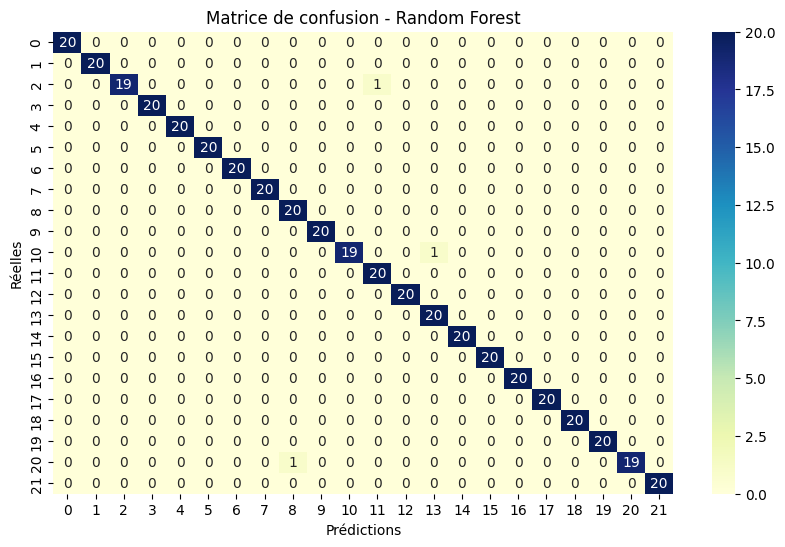

In [12]:
y_pred = model.predict(X_test)
print(" Accuracy :", round(accuracy_score(y_test, y_pred)*100, 2), "%")
print("\nRapport de classification :\n", classification_report(y_test, y_pred))

# Matrice de confusion
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Matrice de confusion - Random Forest")
plt.xlabel("Prédictions")
plt.ylabel("Réelles")
plt.show()

# 8)Optimisation (Grid Search)

In [15]:
param_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5,
    n_jobs=-1,
    scoring="accuracy"
)
grid.fit(X_train, y_train)

print("Meilleurs hyperparamètres :", grid.best_params_)
best_model = grid.best_estimator_


Meilleurs hyperparamètres : {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


# 9)Importance des variables

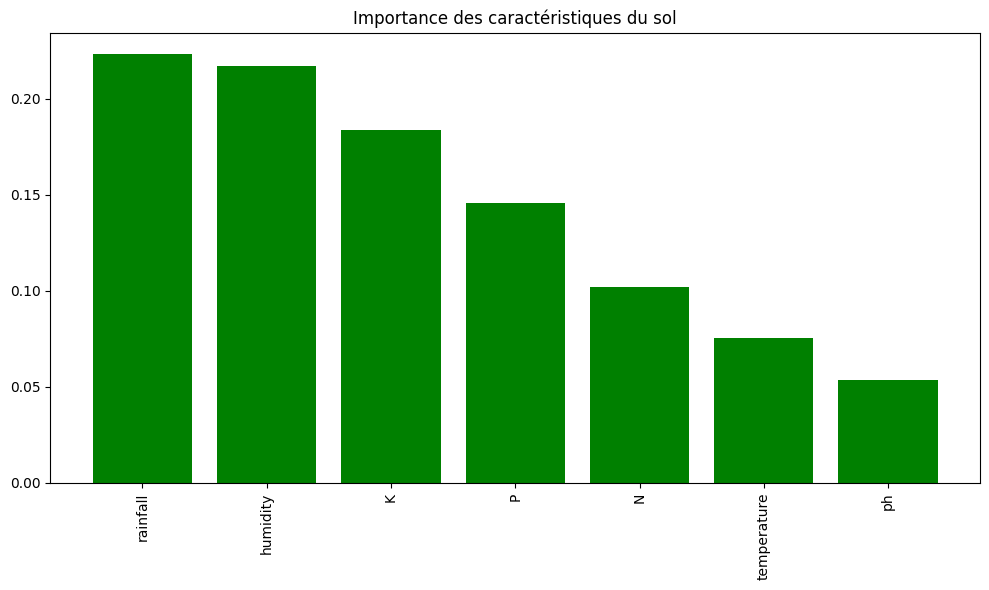

In [16]:
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(X.shape[1]), importances[indices], color='green')
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.title("Importance des caractéristiques du sol")
plt.tight_layout()
plt.show()

# 10) Sauvegarde du modèle

In [19]:
joblib.dump(best_model, "random_forest_crop_model.pkl")
joblib.dump(scaler, "scaler.pkl")

print(" Modèle et scaler enregistrés avec succès.")

 Modèle et scaler enregistrés avec succès.
